# Exploratory Data Analysis (EDA)

# Table of Contents

- [Data Loading and Library Imports](#data-loading-and-library-imports)
- [Data Preview](#data-preview)
  - [Date Features Review](#date-features-review)
  - [Descriptive Atributes Analysis](#descriptive-atributes-analysis)
- [Missing Values Analysis](#missing-values-analysis)
- [Numeric Features Analysis and Outlier Detection](#numeric-features-analysis-and-outlier-detection)
- [Data Cleaning and Preparation](#data-cleaning-and-preparation)
- [EDA after Data Cleaning](#eda-after-data-cleaning)
- [Exploratory Data Analysis \(EDA\) Summary](#exploratory-data-analysis-eda-summary)

## Data Loading and Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

In [2]:
df_train = pd.read_csv("../data/training.csv", sep='\t')
df_val = pd.read_csv("../data/validation.csv", sep='\t')

print("Train shape:", df_train.shape)
print("Validation shape:", df_val.shape)

Train shape: (29731, 14)
Validation shape: (1878, 13)


## Data Preview
### Training Set

In [3]:
df_train.head()


,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016,175,61,440
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138,182,27,350
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447,127,(null),(null)
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587,163,12,150
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090,178,37,490


### Date Features Review

The dataset includes `DepartureYear`, `DepartureMonth`, and `DepartureDay`, which are derived from `DepartureDate`.

However, since the data only covers a 15-day period (October 1–15, 2016), these columns offer no meaningful variation:
- `DepartureYear` and `DepartureMonth` are constant.
- `DepartureDay` contains only values from 1 to 15, limiting its usefulness.

Therefore, we drop these features and instead extract `DepartureWeekday` (0 = Monday, 6 = Sunday) from `DepartureDate`, which may capture meaningful weekly patterns.

In [4]:
df_train["DepartureDate"] = pd.to_datetime(df_train["DepartureDate"], dayfirst=True)
df_train["DepartureWeekday"] = df_train["DepartureDate"].dt.dayofweek.astype("category")
df_train.drop(columns=["DepartureYear", "DepartureMonth", "DepartureDay", "DepartureDate"], inplace=True)

df_val["DepartureDate"] = pd.to_datetime(df_val["DepartureDate"], dayfirst=True)
df_val["DepartureWeekday"] = df_val["DepartureDate"].dt.dayofweek.astype("category")
df_val.drop(columns=["DepartureYear", "DepartureMonth", "DepartureDay", "DepartureDate"], inplace=True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   FlightNumber      29731 non-null  int64   
 1   DepartureAirport  29731 non-null  object  
 2   ArrivalAirport    29731 non-null  object  
 3   Route             29731 non-null  object  
 4   ActualFlightTime  29731 non-null  int64   
 5   ActualTotalFuel   29731 non-null  int64   
 6   ActualTOW         29731 non-null  object  
 7   FLownPassengers   29731 non-null  object  
 8   BagsCount         29731 non-null  object  
 9   FlightBagsWeight  29731 non-null  object  
 10  DepartureWeekday  29731 non-null  category
dtypes: category(1), int64(3), object(7)
memory usage: 2.3+ MB


As we can see, the missing values are not properly identified. We have to replace the `(null)` strings with `np.nan` to handle them correctly. 

In [6]:
df_train.replace("(null)", np.nan, inplace=True)
missing_percentage = (df_train.isnull().sum()/len(df_train))* 100
print("Missing values percentage in training set:")
print(missing_percentage)

Missing values percentage in training set:
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
ActualTOW           1.456392
FLownPassengers     0.319532
BagsCount           7.682217
FlightBagsWeight    8.334735
DepartureWeekday    0.000000
dtype: float64


### Validation Set


In [7]:
df_val.replace("(null)", np.nan, inplace=True)
missing_percentage_val = (df_val.isnull().sum()/len(df_val))* 100
print("Missing values percentage in validation set:")
print(missing_percentage_val)

Missing values percentage in validation set:
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
FLownPassengers     0.479233
BagsCount           8.945687
FlightBagsWeight    9.637913
DepartureWeekday    0.000000
dtype: float64


Let's analyze the missing values in both datasets to understand the extent of the issue.

### Descriptive Atributes Analysis

In [8]:
# Check for duplicate rows
print("Total duplicate rows:", df_train.duplicated().sum())

# Check for duplicate FlightNumbers
print("Duplicate FlightNumbers:", df_train['FlightNumber'].duplicated().sum())

# Unique values in airport columns
print("Unique Departure Airports:", df_train['DepartureAirport'].nunique())
print("Unique Arrival Airports:", df_train['ArrivalAirport'].nunique())

# Check for rare or unexpected airport codes
print("Top 5 Departure Airports:\n", df_train['DepartureAirport'].value_counts().head())
print("Top 5 Arrival Airports:\n", df_train['ArrivalAirport'].value_counts().head())

# Check Route consistency
inconsistent_routes = (df_train['Route'] != (df_train['DepartureAirport'] + '-' + df_train['ArrivalAirport'])).sum()
print("Inconsistent Route entries:", inconsistent_routes)   

Total duplicate rows: 0
Duplicate FlightNumbers: 26413
Unique Departure Airports: 191
Unique Arrival Airports: 190
Top 5 Departure Airports:
 DepartureAirport
STN    2564
DUB    1624
BGY    1156
BCN     888
CRL     764
Name: count, dtype: int64
Top 5 Arrival Airports:
 ArrivalAirport
STN    2567
DUB    1628
BGY    1160
BCN     887
CRL     764
Name: count, dtype: int64
Inconsistent Route entries: 0


In [39]:
import pandas as pd

categorical_cols = ['DepartureAirport', 'ArrivalAirport', 'Route']
rare_threshold = 0.0001  # 0.01%

for col in categorical_cols:
    value_counts = df_train[col].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < rare_threshold].index.tolist()
    print(f"\nColumn: {col}")
    print(f"Number of unique categories: {df_train[col].nunique()}")
    print(f"Rare categories (<0.01%): {rare_categories}")
    print(f"Number of rare categories: {len(rare_categories)}")
    print(f"Top 5 most common:\n{value_counts.head()}")
    # Optionally, group rare categories as 'Other'
    # df_train[col] = df_train[col].apply(lambda x: 'Other' if x in rare_categories else x)


Column: DepartureAirport
Number of unique categories: 191
Rare categories (<0.01%): ['CWL']
Number of rare categories: 1
Top 5 most common:
DepartureAirport
STN    0.086240
DUB    0.054623
BGY    0.038882
BCN    0.029868
CRL    0.025697
Name: proportion, dtype: float64

Column: ArrivalAirport
Number of unique categories: 190
Rare categories (<0.01%): ['CWL']
Number of rare categories: 1
Top 5 most common:
ArrivalAirport
STN    0.086341
DUB    0.054758
BGY    0.039017
BCN    0.029834
CRL    0.025697
Name: proportion, dtype: float64

Column: Route
Number of unique categories: 2667
Rare categories (<0.01%): ['CFU-BTS', 'PFO-NYO', 'NOC-ACE', 'ORK-LPA', 'LPA-WMI', 'CHQ-VNO', 'LBA-CFU', 'CFU-LBA', 'ACE-NOC', 'CHQ-NYO', 'CFU-POZ', 'CRL-FUE', 'VNO-CHQ', 'NYO-PFO', 'NYO-CHQ', 'EMA-RHO', 'TFS-EIN', 'FCO-CIA', 'FUE-CRL', 'BTS-CFU', 'BUD-FCO', 'FCO-BUD', 'MLA-PIK', 'PSA-TFS', 'NOC-TFS', 'SNN-TFS', 'TFS-PSA', 'EIN-LPA', 'EIN-ACE', 'SNN-FUE', 'TFS-SNN', 'KUN-PFO', 'ACE-EIN', 'TFS-NOC', 'EDI-FUE', '

- **Duplicate Rows:**  
  No duplicate rows are present in the training set, so no removal or transformation is needed.

- **FlightNumber:**  
  Duplicate values are expected, as the same flight number can occur on different days.

- **Route Consistency:**  
  The `Route` column is consistent with the combination of `DepartureAirport` and `ArrivalAirport`.

- **Airport Codes:**  
  The unique values in the `DepartureAirport` and `ArrivalAirport` columns are reasonable, with no unexpected or rare codes observed.

- **Categorical Encoding:**  
  Categorical features such as `DepartureAirport`, `ArrivalAirport`, `Route`, `FlightNumber`, and `DepartureWeekday` are encoded using `LabelEncoder` for tree-based models that support categorical data. For linear models (e.g., linear regression), only numerical features are used to avoid introducing spurious ordinal relationships.

In [9]:
# Filter rows where FlownPassengers is missing
missing_actual_tow = df_train[df_train['ActualTOW'].isna()]


# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_actual_tow.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)


Percentage of missing values in these rows:
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW           100.000000
FLownPassengers       8.083141
BagsCount            20.092379
FlightBagsWeight     20.554273
DepartureWeekday      0.000000
dtype: float64


- **ActualTOW Missing Values:**  
  - `ActualTOW` is missing in **2.7%** of the training set, which is a significant portion.
  - Since `ActualTOW` is the target variable, imputation is not possible.
  - **Action:** Rows with missing `ActualTOW` will be dropped during data preparation.

In [10]:
# Filter rows where FlownPassengers is missing
missing_flown_passengers_rows = df_train[df_train['FLownPassengers'].isna()]


# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_flown_passengers_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)

# Filter rows where FlownPassengers is missing
missing_flown_passengers_rows = df_val[df_val['FLownPassengers'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_flown_passengers_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)



Percentage of missing values in these rows:
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW            36.842105
FLownPassengers     100.000000
BagsCount           100.000000
FlightBagsWeight    100.000000
DepartureWeekday      0.000000
dtype: float64

Percentage of missing values in these rows:
FlightNumber          0.0
DepartureAirport      0.0
ArrivalAirport        0.0
Route                 0.0
ActualFlightTime      0.0
ActualTotalFuel       0.0
FLownPassengers     100.0
BagsCount           100.0
FlightBagsWeight    100.0
DepartureWeekday      0.0
dtype: float64


- **Missing `FlownPassengers`:**
  - Whenever `FlownPassengers` is missing, both `BagsCount` and `FlightBagsWeight` are also missing.
  - All three columns are essential features for the prediction task.
  - **Action:** Rows with missing values in `FlownPassengers` will be dropped from the dataset.

#### Bags Count

In [11]:
# Filter rows where BagsCount is missing
missing_bags_count_rows = df_train[df_train['BagsCount'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_bags_count_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)

# Filter rows where BagsCount is missing
missing_bags_count_rows = df_val[df_val['BagsCount'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_bags_count_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)


Percentage of missing values in these rows:
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW             3.809107
FLownPassengers       4.159370
BagsCount           100.000000
FlightBagsWeight     95.140105
DepartureWeekday      0.000000
dtype: float64

Percentage of missing values in these rows:
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
FLownPassengers       5.357143
BagsCount           100.000000
FlightBagsWeight     95.238095
DepartureWeekday      0.000000
dtype: float64


- **Correlation Between `BagsCount` and `FlownPassengers`:**
  - Logically, the number of bags (`BagsCount`) should be closely related to the number of passengers (`FlownPassengers`), since more passengers typically result in more checked bags.
  - To validate this assumption, we will analyze the correlation between these two features in the next step.

Correlation between FlownPassengers and BagsCount: 0.31851806446485775


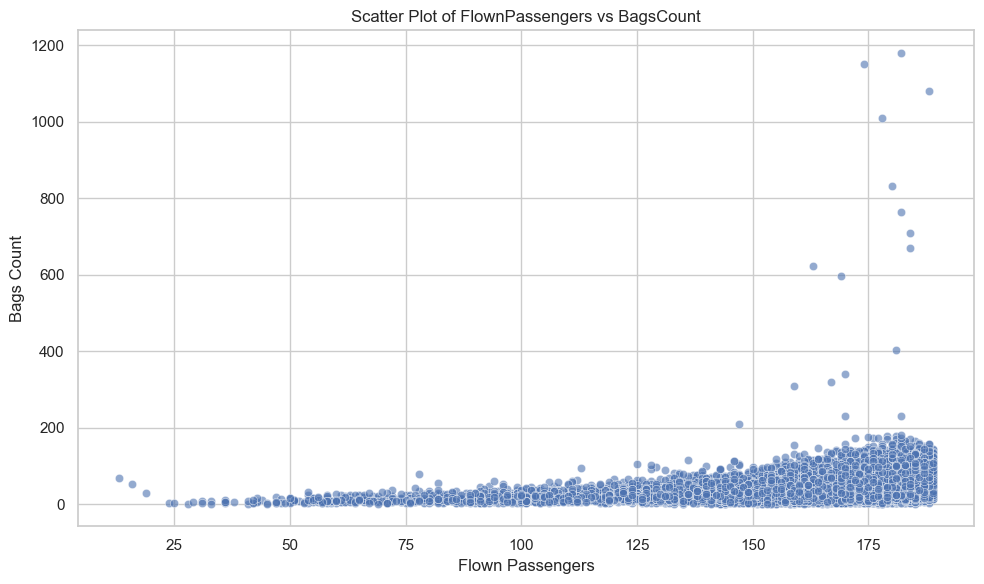

In [12]:
# Ensure both columns are numeric
df_train['FLownPassengers'] = pd.to_numeric(df_train['FLownPassengers'], errors='coerce')
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')

# Drop rows with missing values in either column
df_cleaned = df_train.dropna(subset=['FLownPassengers', 'BagsCount'])

# Calculate the correlation coefficient
correlation = df_cleaned['FLownPassengers'].corr(df_cleaned['BagsCount'])
print(f"Correlation between FlownPassengers and BagsCount: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FLownPassengers', y='BagsCount', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of FlownPassengers vs BagsCount")
plt.xlabel("Flown Passengers")
plt.ylabel("Bags Count")
plt.tight_layout()
plt.show()

- **Note on Correlation Analysis:**
  - The observed correlation is affected by the presence of outliers in the numeric columns.
  - **Next Step:** We will revisit and reassess the correlation after addressing outliers in the relevant features.
#### FlightBagsWeight

In [13]:
# Filter rows where FlightBagsWeight is missing
missing_flight_bags_weight_rows = df_train[df_train['FlightBagsWeight'].isna()]

print("\nMissing FlightBagsWeight rows in training set:")
missing_percentage_in_rows = missing_flight_bags_weight_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows (Train):")
print(missing_percentage_in_rows)


print("\nMissing FlightBagsWeight rows in validation set:")
# Filter rows where FlightBagsWeight is missing in the validation set
missing_flight_bags_weight_rows = df_val[df_val['FlightBagsWeight'].isna()]

missing_percentage_in_rows = missing_flight_bags_weight_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows (Validation):")
print(missing_percentage_in_rows)



Missing FlightBagsWeight rows in training set:

Percentage of missing values in these rows (Train):
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW             3.591606
FLownPassengers       3.833737
BagsCount            87.691687
FlightBagsWeight    100.000000
DepartureWeekday      0.000000
dtype: float64

Missing FlightBagsWeight rows in validation set:

Percentage of missing values in these rows (Validation):
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
FLownPassengers       4.972376
BagsCount            88.397790
FlightBagsWeight    100.000000
DepartureWeekday      0.000000
dtype: float64


- **Imputation Consideration for `FlightBagsWeight`:**
  - When `FlightBagsWeight` is missing, `BagsCount` is also missing, making it risky to use `BagsCount` as a basis for imputation in these cases.
  - To determine if `BagsCount` can be used to impute missing values in `FlightBagsWeight` (when only one is missing), we will analyze the correlation between these two features.
  - **Next Step:** Assess the correlation between `FlightBagsWeight` and `BagsCount` to inform the imputation strategy.

Correlation between BagsCount and FlightBagsWeight: 0.8305423928610965


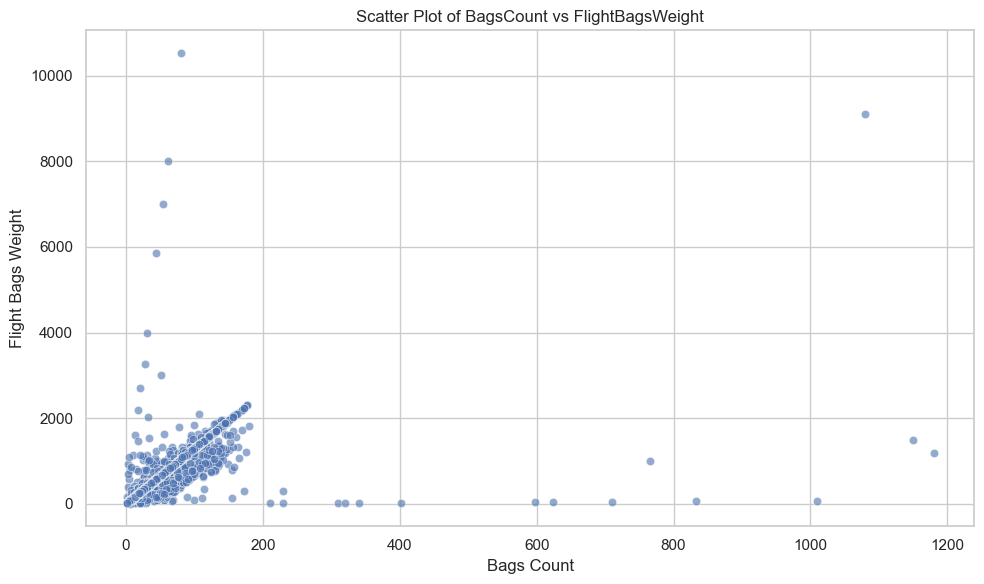

In [14]:
# Ensure both columns are numeric
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')
df_train['FlightBagsWeight'] = pd.to_numeric(df_train['FlightBagsWeight'], errors='coerce')

# Drop rows with missing values in either column
df_cleaned = df_train.dropna(subset=['BagsCount', 'FlightBagsWeight'])

# Calculate the correlation coefficient
correlation = df_cleaned['BagsCount'].corr(df_cleaned['FlightBagsWeight'])
print(f"Correlation between BagsCount and FlightBagsWeight: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BagsCount', y='FlightBagsWeight', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of BagsCount vs FlightBagsWeight")
plt.xlabel("Bags Count")
plt.ylabel("Flight Bags Weight")
plt.tight_layout()
plt.show()

- **Outlier Impact on Correlation:**
  - Both correlation analyses are affected by extreme outliers, which can distort the true relationships between features.
  - **Next Step:** Visualize the distributions of numeric features in both datasets to assess the extent of outliers and missing values. This will help guide further cleaning and imputation strategies.

## Numeric Features Analysis and Outlier Detection
#### FlownPassengers

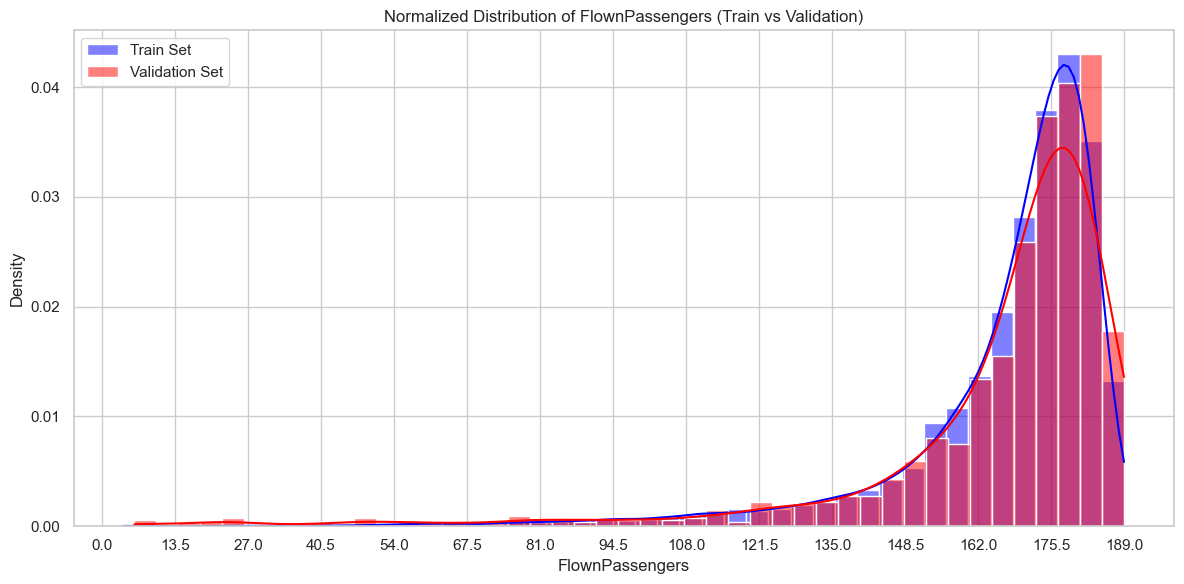

29731 29636 train samples
1878 1869 validation samples


In [15]:
# Ensure the 'FlownPassengers' column is numeric
df_train['FLownPassengers'] = pd.to_numeric(df_train['FLownPassengers'], errors='coerce')
df_val['FLownPassengers'] = pd.to_numeric(df_val['FLownPassengers'], errors='coerce')

# Drop missing values after conversion
flown_passengers_train = df_train['FLownPassengers'].dropna()
flown_passengers_val = df_val['FLownPassengers'].dropna()

# Proceed with your plotting code
plt.figure(figsize=(12, 6))
sns.histplot(flown_passengers_train, kde=True, bins=45, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(flown_passengers_val, kde=True, bins=45, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of FlownPassengers (Train vs Validation)")
plt.xlabel("FlownPassengers")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(flown_passengers_train.max(), flown_passengers_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(flown_passengers_train), "train samples")
print(len(df_val), len(flown_passengers_val), "validation samples")


- **FlownPassengers Outlier Analysis:**
  - There are no unexpected outliers in the `FlownPassengers` column; flights with low passenger counts are plausible.
  - Rows with missing `FlownPassengers` values will be excluded from the training set.
  - For the validation set, missing `FlownPassengers` values will be imputed using the median from the training set, as the distribution is strongly right-skewed.

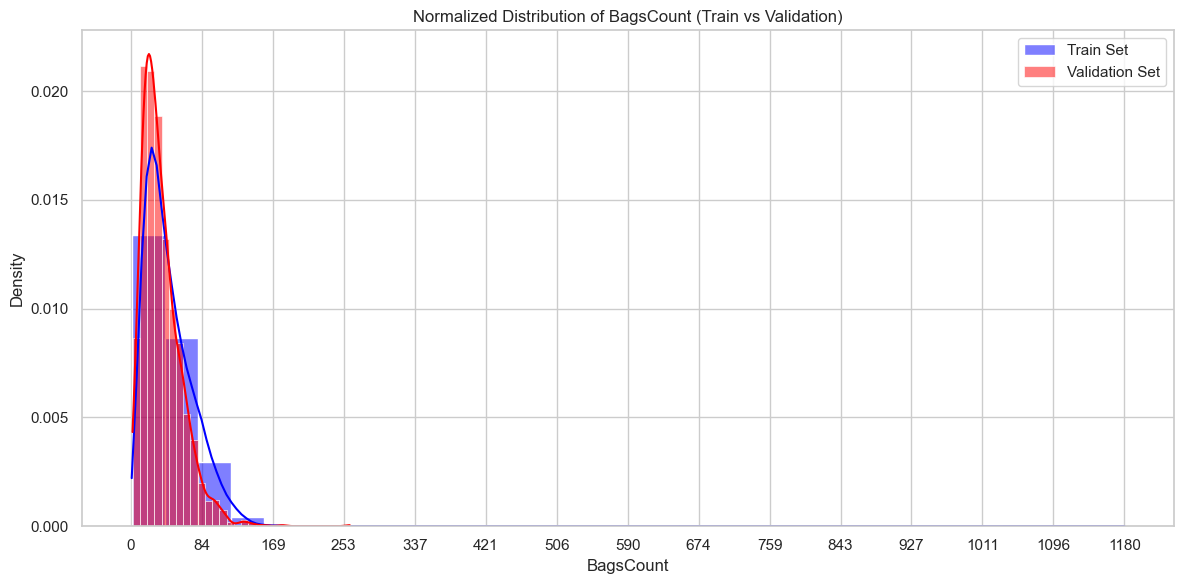

29731 27447 train samples
1878 1710 validation samples
1180.0 max bags count in train set
260.0 max bags count in validation set


In [16]:
# Ensure the 'BagsCount' column is numeric
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')
df_val['BagsCount'] = pd.to_numeric(df_val['BagsCount'], errors='coerce')

# Drop missing values after conversion
bags_count_train = df_train['BagsCount'].dropna()
bags_count_val = df_val['BagsCount'].dropna()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(bags_count_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(bags_count_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of BagsCount (Train vs Validation)")
plt.xlabel("BagsCount")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(bags_count_train.max(), bags_count_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 10 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(bags_count_train), "train samples")
print(len(df_val), len(bags_count_val), "validation samples")

print(max(bags_count_train), "max bags count in train set")
print(max(bags_count_val), "max bags count in validation set")

- **Outlier Issue in `BagsCount`:**
  - The `BagsCount` column contains unrealistic outliers (e\.g\., values as high as 1080), which are not plausible for typical flights\.
  - **Action:** Outliers in `BagsCount` will be handled by capping values below the 1st percentile and above the 99th percentile, ensuring a more robust and realistic distribution\. This approach will also be applied to the `FlightBagsWeight` column\.

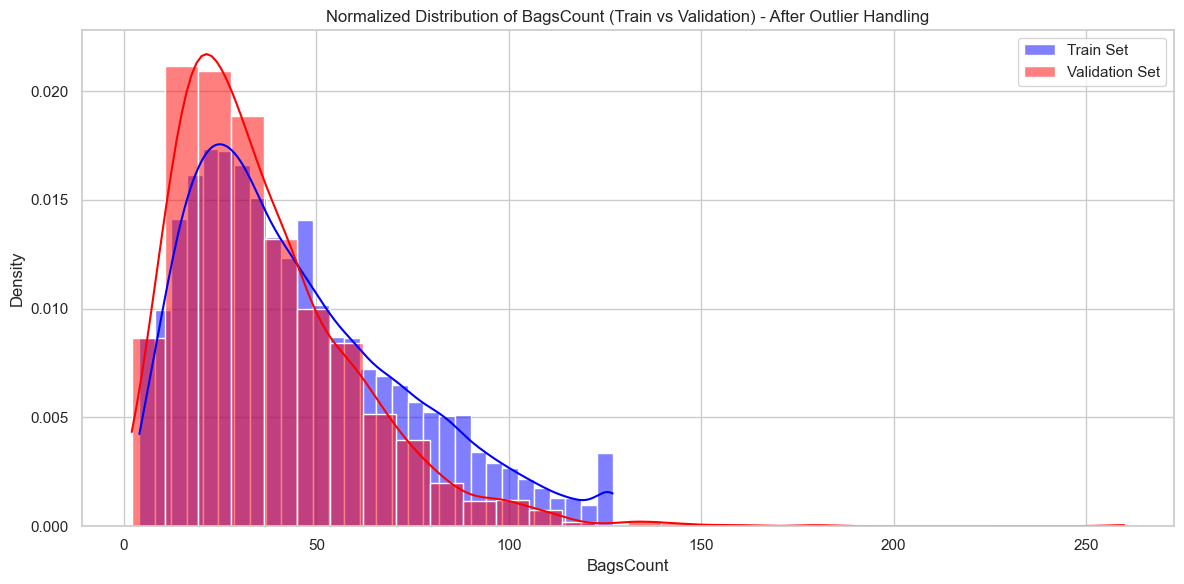

1st Percentile: 4.0, 99th Percentile: 127.0
29731 27447 train samples after outlier handling
1878 1710 validation samples


In [17]:
# Create a copy of the original dataframe
df_train_copy = df_train.copy()

df_train_copy['BagsCount'] = pd.to_numeric(df_train_copy['BagsCount'], errors='coerce')

# Calculate the 1st and 99th percentiles
percentile_01 = df_train_copy['BagsCount'].quantile(0.01)
percentile_99 = df_train_copy['BagsCount'].quantile(0.99)

# Cap values below the 1st percentile and above the 99th percentile
df_train_copy['BagsCount'] = np.where(df_train_copy['BagsCount'] < percentile_01, percentile_01, df_train_copy['BagsCount'])
df_train_copy['BagsCount'] = np.where(df_train_copy['BagsCount'] > percentile_99, percentile_99, df_train_copy['BagsCount'])

# Recalculate the cleaned BagsCount column
bags_count_train = df_train_copy['BagsCount'].dropna()

# Re-plot the distribution after handling outliers
plt.figure(figsize=(12, 6))
sns.histplot(bags_count_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(bags_count_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of BagsCount (Train vs Validation) - After Outlier Handling")
plt.xlabel("BagsCount")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

print(f"1st Percentile: {percentile_01}, 99th Percentile: {percentile_99}")
print(len(df_train_copy), len(bags_count_train), "train samples after outlier handling")
print(len(df_val), len(bags_count_val), "validation samples")

- **BagsCount Outlier Handling:**
  - After capping outliers, the `BagsCount` distribution is more realistic and suitable for analysis.
  - The capped `BagsCount` values will be used for all subsequent analyses and for imputing missing values.

#### FlightBagsWeight


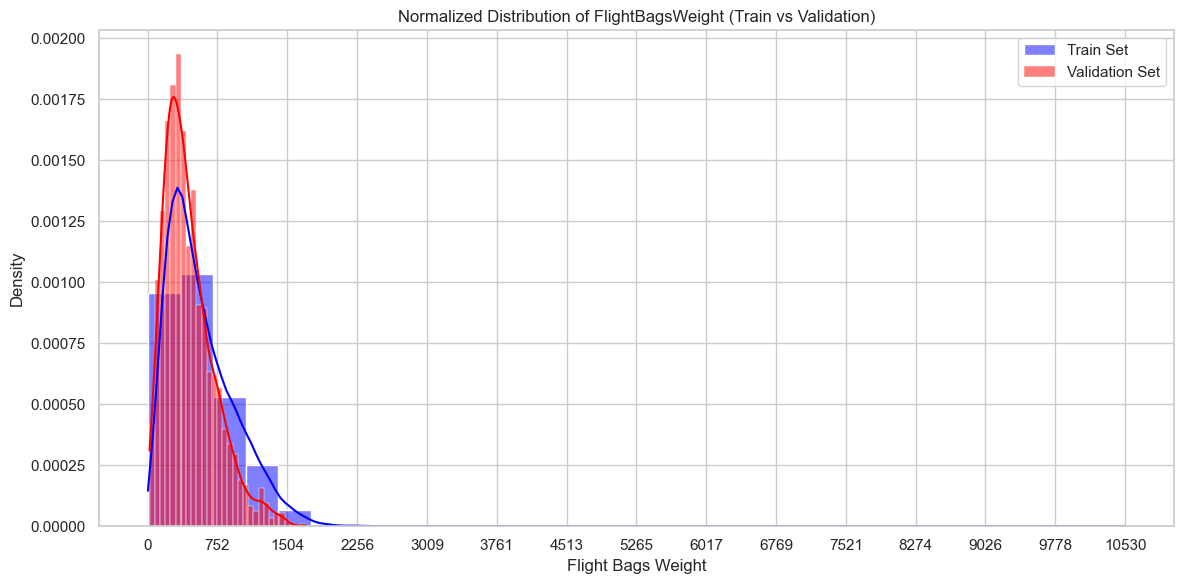

29731 27253 train samples
1878 1697 validation samples
10530.0 max flight bags weight in train set
1700.0 max flight bags weight in validation set


In [18]:
# Ensure the 'FlightBagsWeight' column is numeric
df_train['FlightBagsWeight'] = pd.to_numeric(df_train['FlightBagsWeight'], errors='coerce')
df_val['FlightBagsWeight'] = pd.to_numeric(df_val['FlightBagsWeight'], errors='coerce')

# Drop missing values after conversion
flight_bags_weight_train = df_train['FlightBagsWeight'].dropna()
flight_bags_weight_val = df_val['FlightBagsWeight'].dropna()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(flight_bags_weight_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(flight_bags_weight_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of FlightBagsWeight (Train vs Validation)")
plt.xlabel("Flight Bags Weight")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(flight_bags_weight_train.max(), flight_bags_weight_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(flight_bags_weight_train), "train samples")
print(len(df_val), len(flight_bags_weight_val), "validation samples")

print(max(flight_bags_weight_train), "max flight bags weight in train set")
print(max(flight_bags_weight_val), "max flight bags weight in validation set")

- **FlightBagsWeight Outlier Handling:**
  - The `FlightBagsWeight` column contains unrealistic extreme outliers.
  - **Action:** Outliers in `FlightBagsWeight` will be capped at the 95th percentile, ensuring a more robust and realistic distribution, similar to the approach used for `BagsCount`.

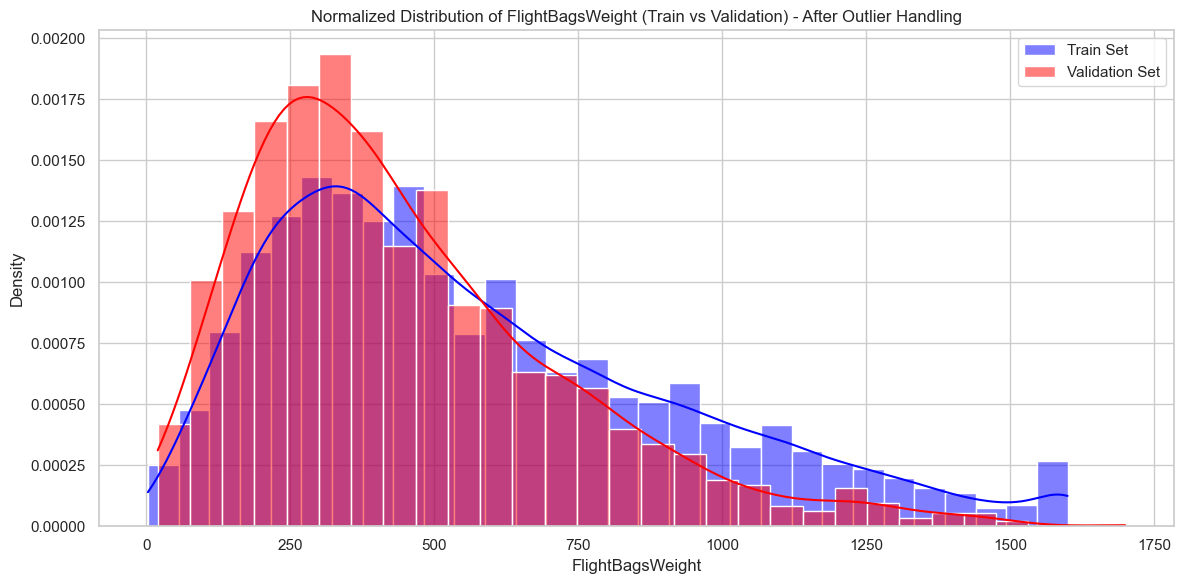

99th Percentile: 1600.0
29731 27253 train samples after outlier handling
1878 1697 validation samples


In [19]:
# Create a copy of the original dataframe
df_train_copy = df_train.copy()

# Calculate the 99th percentile
percentile_99 = df_train_copy['FlightBagsWeight'].quantile(0.99)  # Correctly calculate the 99th percentile

# Cap values above the 99th percentile
df_train_copy['FlightBagsWeight'] = np.where(df_train_copy['FlightBagsWeight'] > percentile_99, percentile_99, df_train_copy['FlightBagsWeight'])

# Recalculate the cleaned FlightBagsWeight column
flight_bags_weight_train = df_train_copy['FlightBagsWeight'].dropna()

# Re-plot the distribution after handling outliers
plt.figure(figsize=(12, 6))
sns.histplot(flight_bags_weight_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(flight_bags_weight_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of FlightBagsWeight (Train vs Validation) - After Outlier Handling")
plt.xlabel("FlightBagsWeight")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

print(f"99th Percentile: {percentile_99}")
print(len(df_train_copy), len(flight_bags_weight_train), "train samples after outlier handling")
print(len(df_val), len(flight_bags_weight_val), "validation samples")

- **FlightBagsWeight Outlier Handling:**
  - After capping outliers, the `FlightBagsWeight` distribution is much more reasonable and suitable for analysis.
  - The next step is to revisit the correlation analysis between `BagsCount` and `FlightBagsWeight` using the cleaned data.


Correlation between FlownPassengers and BagsCount: 0.3647970722276672


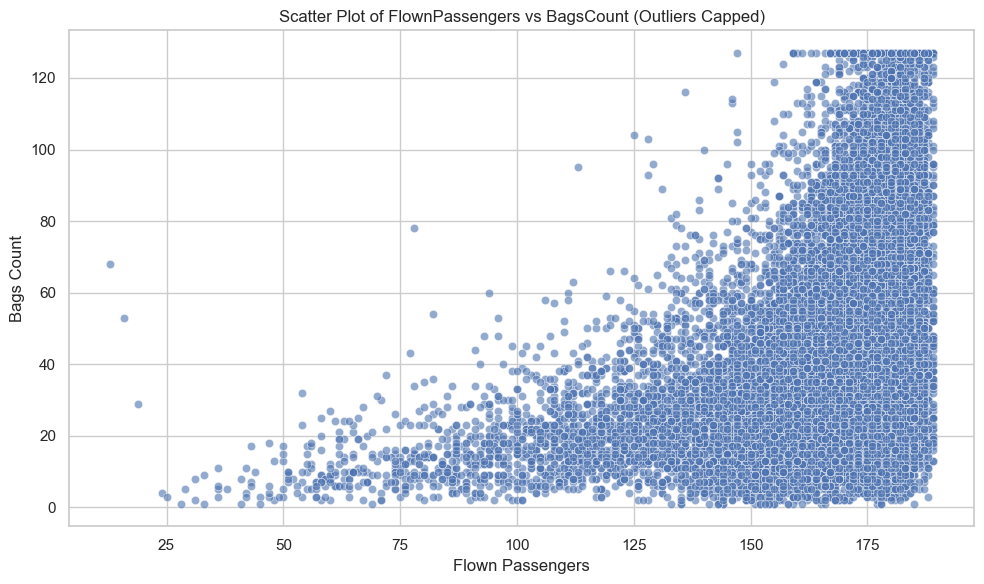

In [20]:
# Ensure both columns are numeric
df_train['FLownPassengers'] = pd.to_numeric(df_train['FLownPassengers'], errors='coerce')
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')

# Calculate the 99th percentile for BagsCount
percentile_99 = df_train['BagsCount'].quantile(0.99)

# Create a copy of the original dataframe
df_train_copy = df_train.copy()

# Cap values above the 99th percentile
df_train_copy['BagsCount'] = np.where(df_train_copy['BagsCount'] > percentile_99, percentile_99, df_train_copy['BagsCount'])


# Drop rows with missing values in either column
df_cleaned = df_train_copy.dropna(subset=['FLownPassengers', 'BagsCount'])

# Calculate the correlation coefficient
correlation = df_cleaned['FLownPassengers'].corr(df_cleaned['BagsCount'])
print(f"Correlation between FlownPassengers and BagsCount: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FLownPassengers', y='BagsCount', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of FlownPassengers vs BagsCount (Outliers Capped)")
plt.xlabel("Flown Passengers")
plt.ylabel("Bags Count")
plt.tight_layout()
plt.show()

- **BagsCount Imputation Strategy:**
  - Despite outlier handling, the correlation between `FlownPassengers` and `BagsCount` remains insufficient for reliable imputation.
  - **Action:** Missing values in `BagsCount` will be imputed using the median value from the training set, ensuring a robust and unbiased approach.

Correlation between BagsCount and FlightBagsWeight: 0.9689016061136357


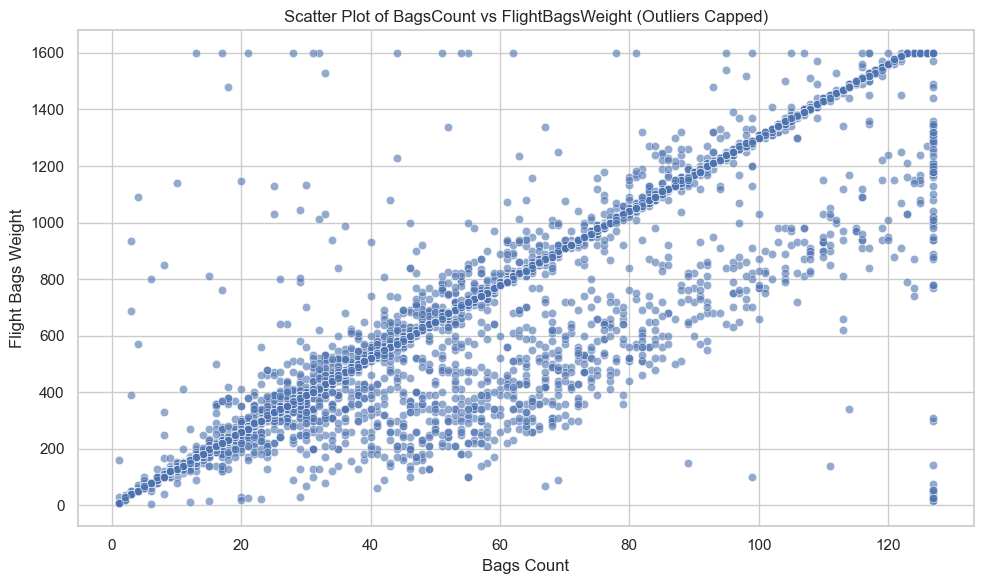

In [21]:
# Create a copy of the original dataframe
df_train_copy = df_train.copy()

# Ensure both columns are numeric
df_train_copy['BagsCount'] = pd.to_numeric(df_train_copy['BagsCount'], errors='coerce')
df_train_copy['FlightBagsWeight'] = pd.to_numeric(df_train_copy['FlightBagsWeight'], errors='coerce')

# Calculate the 99th percentile for both columns
percentile_99_bags = df_train_copy['BagsCount'].quantile(0.99)
percentile_99_weight = df_train_copy['FlightBagsWeight'].quantile(0.99)

# Cap values above the 99th percentile
df_train_copy['BagsCount'] = np.where(df_train_copy['BagsCount'] > percentile_99_bags, percentile_99_bags, df_train_copy['BagsCount'])
df_train_copy['FlightBagsWeight'] = np.where(df_train_copy['FlightBagsWeight'] > percentile_99_weight, percentile_99_weight, df_train_copy['FlightBagsWeight'])

# Drop rows with missing values in either column
df_cleaned = df_train_copy.dropna(subset=['BagsCount', 'FlightBagsWeight'])

# Calculate the correlation coefficient
correlation = df_cleaned['BagsCount'].corr(df_cleaned['FlightBagsWeight'])
print(f"Correlation between BagsCount and FlightBagsWeight: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BagsCount', y='FlightBagsWeight', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of BagsCount vs FlightBagsWeight (Outliers Capped)")
plt.xlabel("Bags Count")
plt.ylabel("Flight Bags Weight")
plt.tight_layout()
plt.show()

- **Imputation of `FlightBagsWeight` Using `BagsCount`:**  
  There is a clear correlation between `BagsCount` and `FlightBagsWeight`. Therefore, missing values in `FlightBagsWeight` can be imputed using `BagsCount` and the average weight per bag, calculated from the available data. This approach ensures that imputed values are consistent with observed relationships in the dataset.
#### ActualTotalFuel

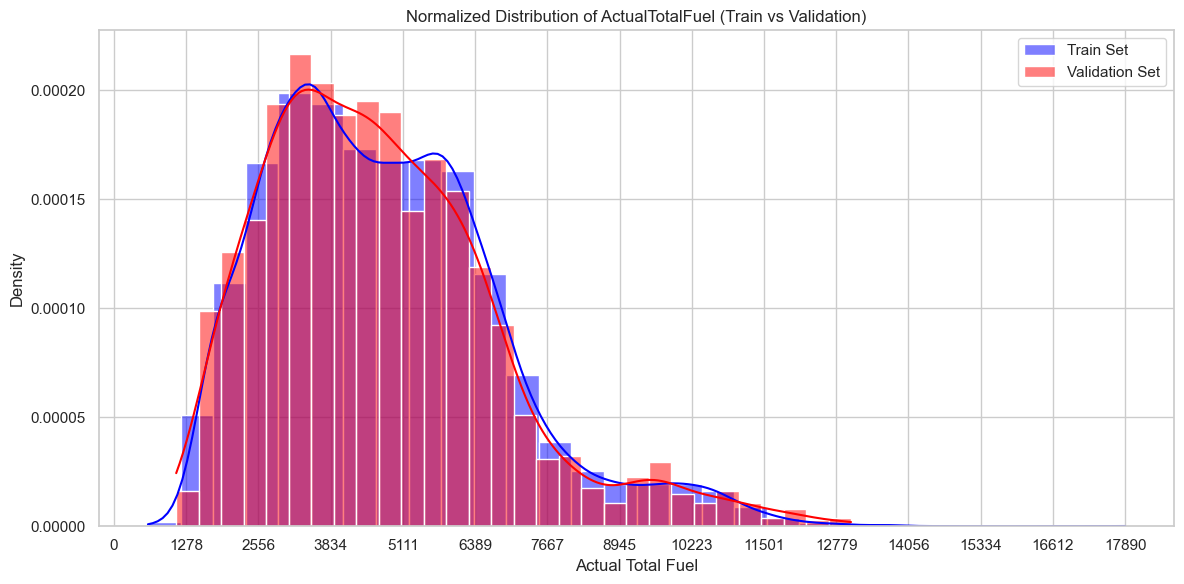

29731 29731 train samples
1878 1878 validation samples


In [22]:
# Ensure the 'ActualTotalFuel' column is numeric
df_train['ActualTotalFuel'] = pd.to_numeric(df_train['ActualTotalFuel'], errors='coerce')
df_val['ActualTotalFuel'] = pd.to_numeric(df_val['ActualTotalFuel'], errors='coerce')

# Drop missing values after conversion
actual_total_fuel_train = df_train['ActualTotalFuel'].dropna()
actual_total_fuel_val = df_val['ActualTotalFuel'].dropna()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(actual_total_fuel_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(actual_total_fuel_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of ActualTotalFuel (Train vs Validation)")
plt.xlabel("Actual Total Fuel")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(actual_total_fuel_train.max(), actual_total_fuel_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(actual_total_fuel_train), "train samples")
print(len(df_val), len(actual_total_fuel_val), "validation samples")

#### ActualTOW

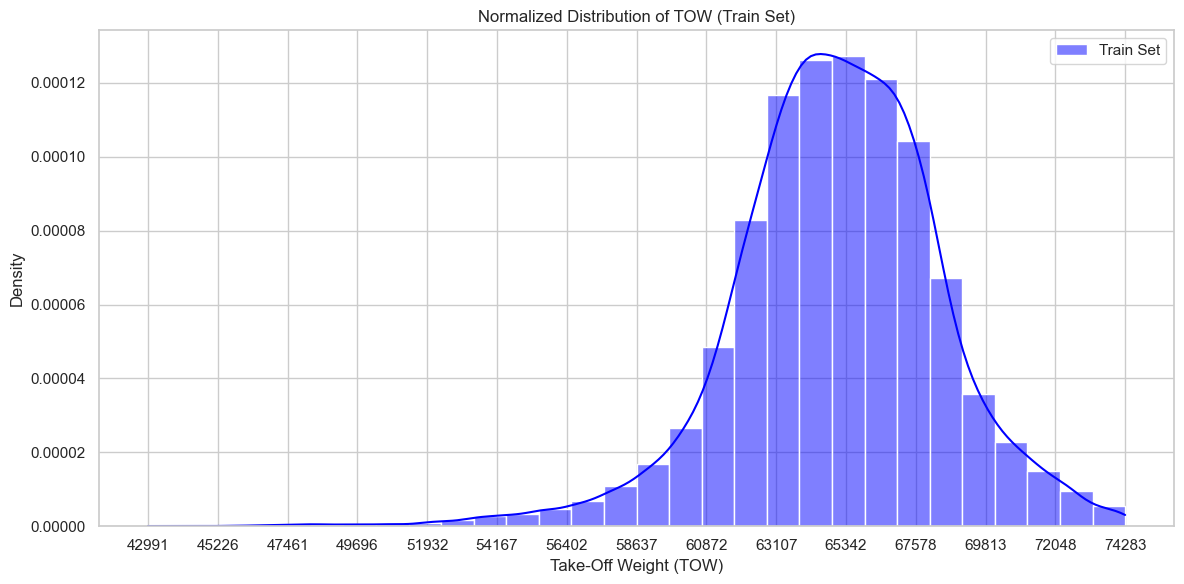

29731 29298 train samples


In [23]:
# Ensure the 'TOW' column is numeric
df_train['ActualTOW'] = pd.to_numeric(df_train['ActualTOW'], errors='coerce')

# Drop missing values after conversion
tow_train = df_train['ActualTOW'].dropna()

# Plot the distribution of TOW
plt.figure(figsize=(12, 6))
sns.histplot(tow_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of TOW (Train Set)")
plt.xlabel("Take-Off Weight (TOW)")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = tow_train.max()
min_val = tow_train.min()
plt.xticks(np.linspace(min_val, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(tow_train), "train samples")

#### FlightTime

Train set - max and min values: 1504 2
Validation set - max and min values: 318 7
Train set - 1st and 99th percentiles: 31.0 250.0
Validation set - 1st and 99th percentiles: 31.0 268.46000000000004


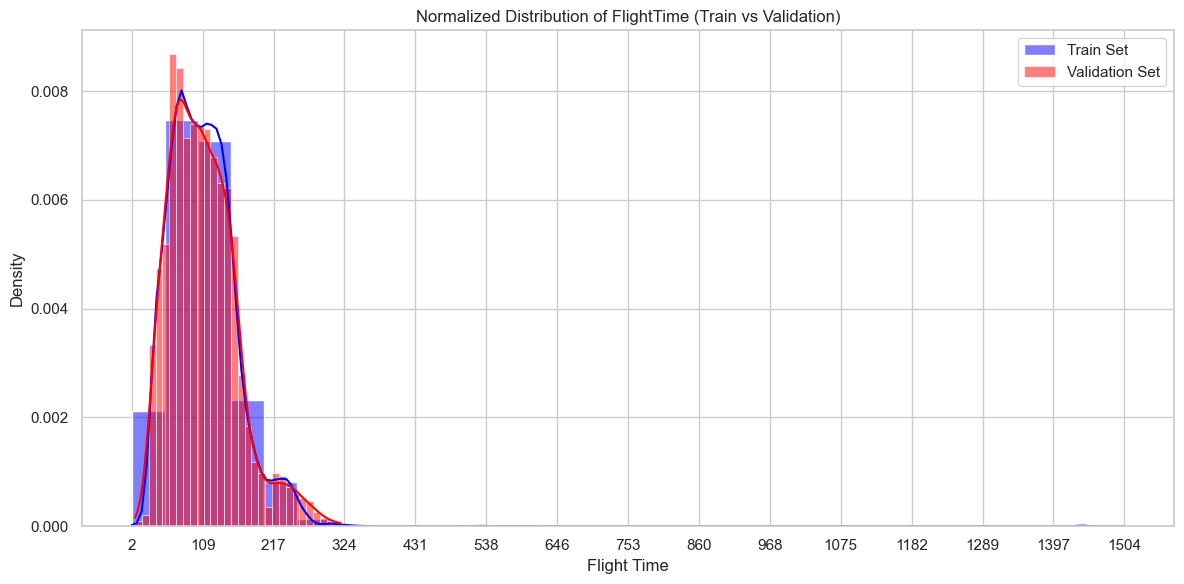

In [24]:
# Ensure the 'ActualFlightTime' column is numeric for both train and validation sets
df_train['ActualFlightTime'] = pd.to_numeric(df_train['ActualFlightTime'], errors='coerce')
df_val['ActualFlightTime'] = pd.to_numeric(df_val['ActualFlightTime'], errors='coerce')

# Drop missing values after conversion
flight_time_train = df_train['ActualFlightTime'].dropna()
flight_time_val = df_val['ActualFlightTime'].dropna()

# Plot the distribution of FlightTime for both train and validation sets
plt.figure(figsize=(12, 6))
sns.histplot(flight_time_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(flight_time_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of FlightTime (Train vs Validation)")
plt.xlabel("Flight Time")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(flight_time_train.max(), flight_time_val.max())
min_val = min(flight_time_train.min(), flight_time_val.min())
plt.xticks(np.linspace(min_val, max_val, num=15))  # Use 15 evenly spaced ticks

print("Train set - max and min values:", flight_time_train.max(), flight_time_train.min())
print("Validation set - max and min values:", flight_time_val.max(), flight_time_val.min())
print("Train set - 1st and 99th percentiles:", flight_time_train.quantile(0.01), flight_time_train.quantile(0.99))
print("Validation set - 1st and 99th percentiles:", flight_time_val.quantile(0.01), flight_time_val.quantile(0.99))

plt.tight_layout()
plt.show()

- **Flight Time Outlier Handling:**  
  There are suspicious outliers in the `ActualFlightTime` feature, with values as low as 2 minutes and as high as 1500 minutes. To address this, we will cap values below the 1st percentile and above the 99th percentile, following the same approach used for the `BagsCount` and `FlightBagsWeight` columns. This ensures a more robust and realistic distribution for modeling.

## Data Cleaning and Preparation

In [25]:
# Reload the original dataframes
df_train = pd.read_csv("../data/training.csv", sep='\t')
df_val = pd.read_csv("../data/validation.csv", sep='\t')

from preprocessing.preprocessing import preprocess_train_val
df_train_clean, df_val_clean = preprocess_train_val(df_train, df_val)

In [26]:
# 5. Quick sanity check after cleaning
print("Train shape:", df_train_clean.shape)
print("Validation shape:", df_val_clean.shape)
print("Train missing values:\n", df_train_clean.isnull().sum())
print("Validation missing values:\n", df_val_clean.isnull().sum())

Train shape: (29238, 11)
Validation shape: (1878, 10)
Train missing values:
 FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
ActualTOW           0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
DepartureWeekday    0
dtype: int64
Validation missing values:
 FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
DepartureWeekday    0
dtype: int64


## EDA after Data Cleaning

In [27]:
#Data Shapes and first rows
print("Train shape:", df_train_clean.shape)
print("Validation shape:", df_val_clean.shape)

display(df_train_clean.head())
display(df_val_clean.head())

Train shape: (29238, 11)
Validation shape: (1878, 10)


,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight,DepartureWeekday
0,1145,MAN,SXF,MAN-SXF,91,3660,64016.0,175.0,61.0,440.000000,5
1,1160,CTA,FCO,CTA-FCO,68,3280,66138.0,182.0,27.0,350.000000,5
2,1183,LGW,SNN,LGW-SNN,64,2720,58447.0,127.0,38.0,491.505655,5
3,1220,ATH,CHQ,ATH-CHQ,35,1682,60587.0,163.0,12.0,150.000000,5
4,1225,CHQ,ATH,CHQ-ATH,34,1877,63090.0,178.0,37.0,490.000000,5


,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,FLownPassengers,BagsCount,FlightBagsWeight,DepartureWeekday
0,6003,MRS,BES,MRS-BES,84,3630,185.0,43.0,560.000000,1
1,6004,BES,MRS,BES-MRS,86,3690,188.0,38.0,491.505655,1
2,6542,MRS,STN,MRS-STN,100,4390,168.0,55.0,720.000000,1
3,6541,STN,MRS,STN-MRS,100,4690,185.0,35.0,460.000000,1
4,5542,STN,REU,STN-REU,112,4900,167.0,31.0,400.000000,1


In [28]:
# Summary statistics
display(df_train_clean.describe())

# Data types
print(df_train_clean.dtypes)

,FlightNumber,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
count,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000,29238.000000
mean,4826.725255,109.676825,4784.731138,65061.546515,167.277960,44.457076,567.218414
std,3057.689134,47.870538,2060.711395,3267.911435,20.154259,26.949756,344.900131
min,11.000000,31.000000,720.000000,43844.000000,4.000000,4.000000,50.000000
25%,2094.000000,73.000000,3220.000000,63127.000000,163.000000,24.000000,310.000000
50%,4775.000000,105.000000,4530.000000,65122.000000,173.000000,38.000000,491.505655
75%,7498.000000,139.000000,6009.000000,67154.000000,179.000000,60.000000,760.000000
max,9998.000000,250.000000,14907.000000,74283.000000,189.000000,126.000000,1629.729278


FlightNumber           int64
DepartureAirport      object
ArrivalAirport        object
Route                 object
ActualFlightTime       int64
ActualTotalFuel        int64
ActualTOW            float64
FLownPassengers      float64
BagsCount            float64
FlightBagsWeight     float64
DepartureWeekday    category
dtype: object


In [29]:
print("Duplicate rows in train:", df_train_clean.duplicated().sum())
print("Duplicate rows in val:", df_val_clean.duplicated().sum())

Duplicate rows in train: 0
Duplicate rows in val: 0


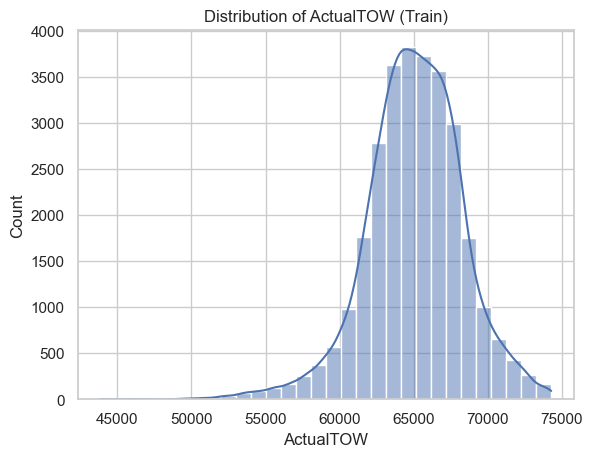

count    29238.000000
mean     65061.546515
std       3267.911435
min      43844.000000
25%      63127.000000
50%      65122.000000
75%      67154.000000
max      74283.000000
Name: ActualTOW, dtype: float64


In [30]:
# Visualize the distribution of ActualTOW in the cleaned training set
sns.histplot(df_train_clean["ActualTOW"], kde=True, bins=30)
plt.title("Distribution of ActualTOW (Train)")
plt.show()

print(df_train_clean["ActualTOW"].describe())

- **ActualTOW Lower Tail:**  
  Although the minimum `ActualTOW` is significantly lower than most values, the smooth lower tail of the distribution indicates these are rare but plausible cases, not isolated anomalies or data errors.

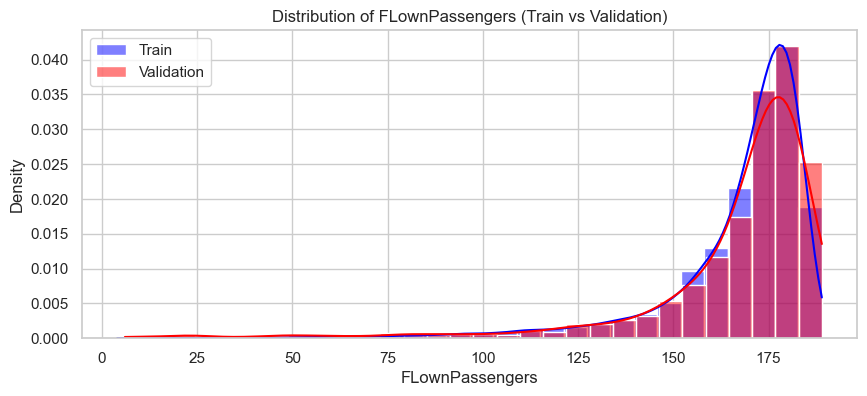

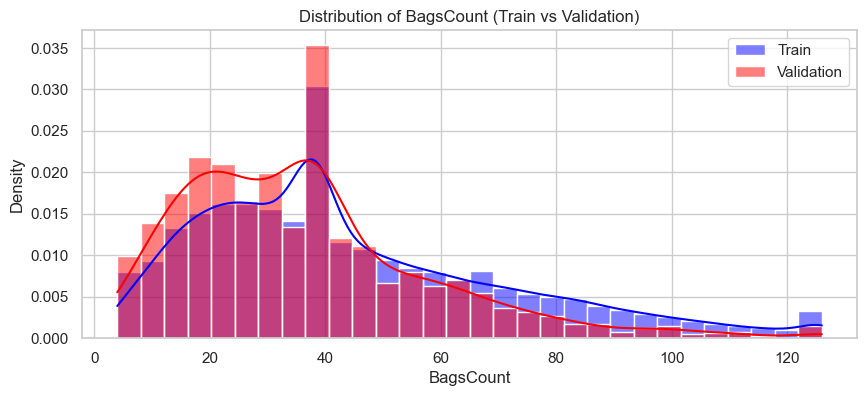

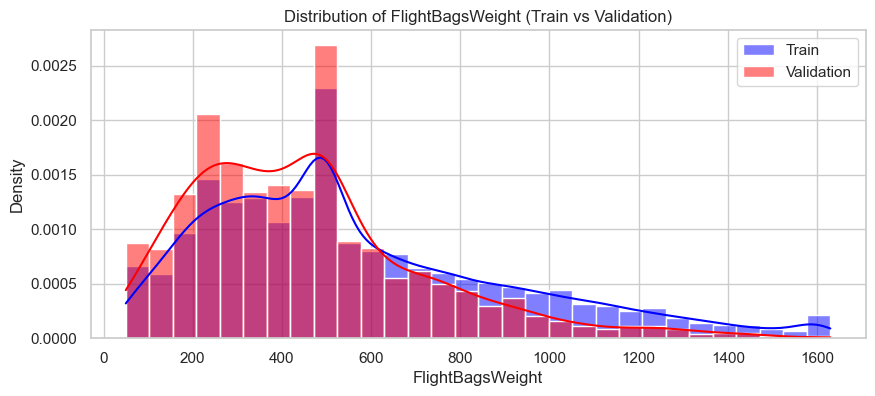

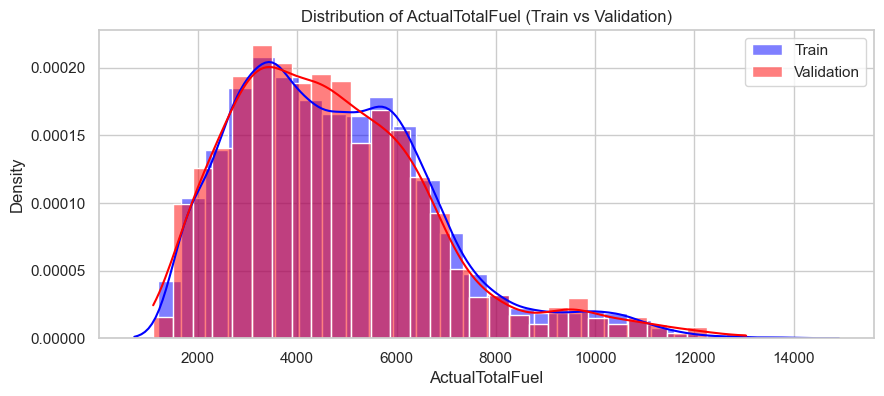

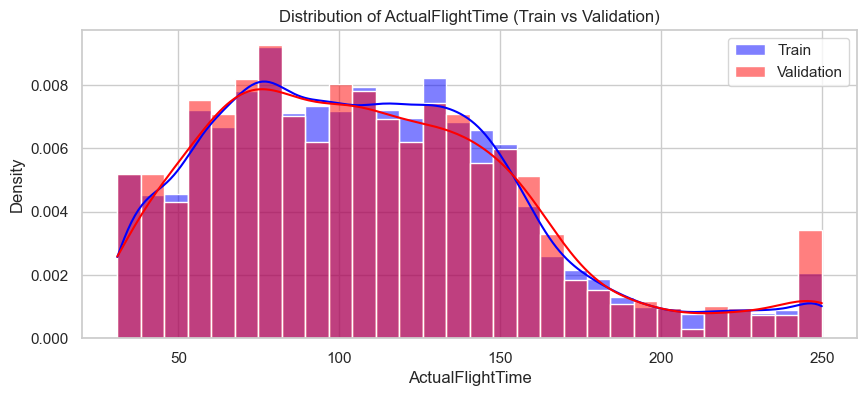

In [31]:
features = ["FLownPassengers", "BagsCount", "FlightBagsWeight", "ActualTotalFuel", "ActualFlightTime"]
for feat in features:
    plt.figure(figsize=(10,4))
    sns.histplot(df_train_clean[feat], kde=True, color='blue', label='Train', stat='density', bins=30, alpha=0.5)
    sns.histplot(df_val_clean[feat], kde=True, color='red', label='Validation', stat='density', bins=30, alpha=0.5)
    plt.title(f"Distribution of {feat} (Train vs Validation)")
    plt.legend()
    plt.show()

- **Feature Correlation Analysis:**  
  The distributions of the main features in the train and validation sets are well aligned, supporting model generalization. Next, we examine the correlation between these features and the target variable, `ActualTOW`, to assess their predictive value. This helps identify which features are most strongly associated with the target and should be prioritized in modeling.

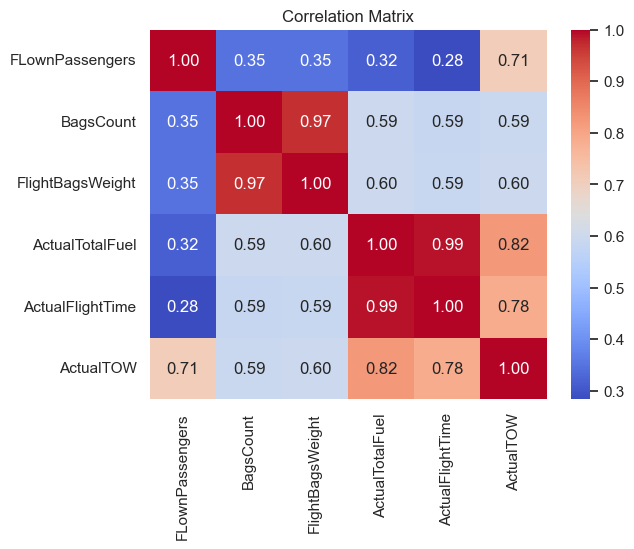

In [32]:
corr = df_train_clean[features + ['ActualTOW']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

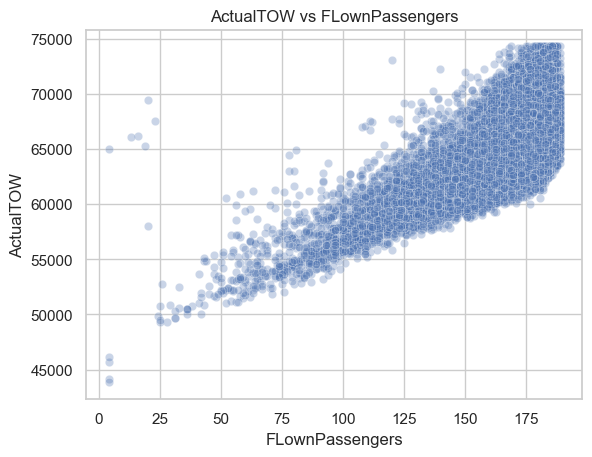

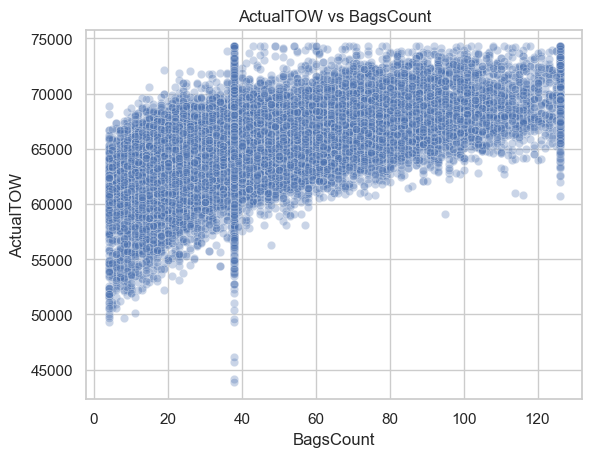

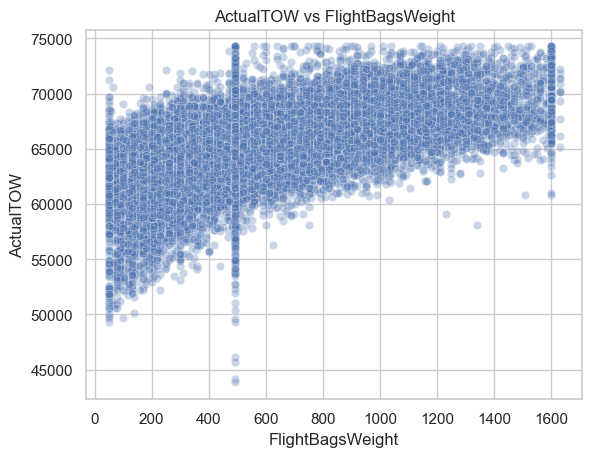

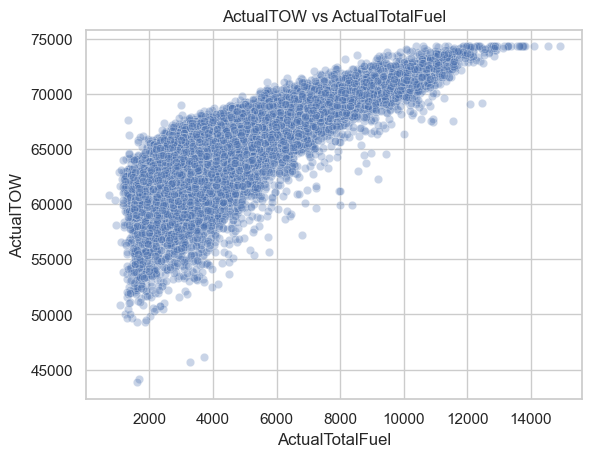

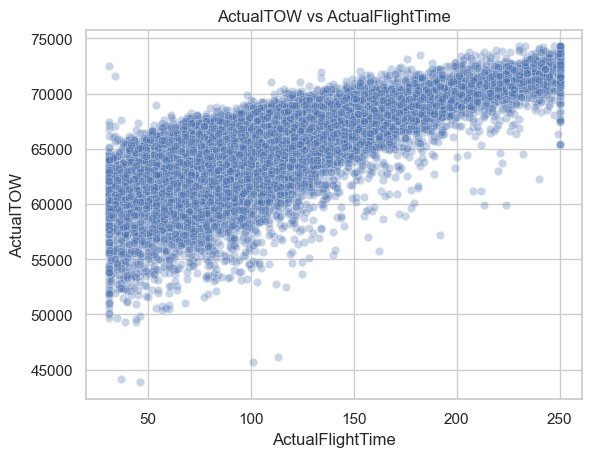

In [33]:
import seaborn as sns
for col in ["FLownPassengers", "BagsCount", "FlightBagsWeight", "ActualTotalFuel", "ActualFlightTime"]:
    sns.scatterplot(x=df_train_clean[col], y=df_train_clean["ActualTOW"], alpha=0.3)
    plt.title(f"ActualTOW vs {col}")
    plt.show()

- **Scatter Plot Insights:**  
  The scatter plots indicate that `ActualTOW` is positively correlated with all main features. While the relationships are not strictly linear, they suggest that these features are informative for predicting `ActualTOW`. Artifacts from data imputation and outlier handling are present but do not significantly distort these relationships, supporting the reliability of the cleaned data for modeling.

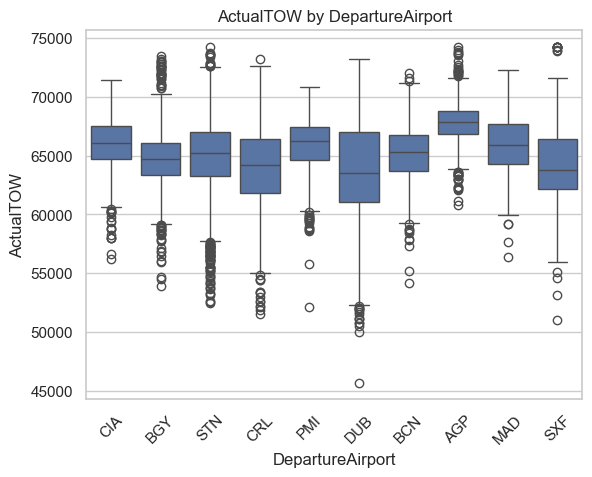

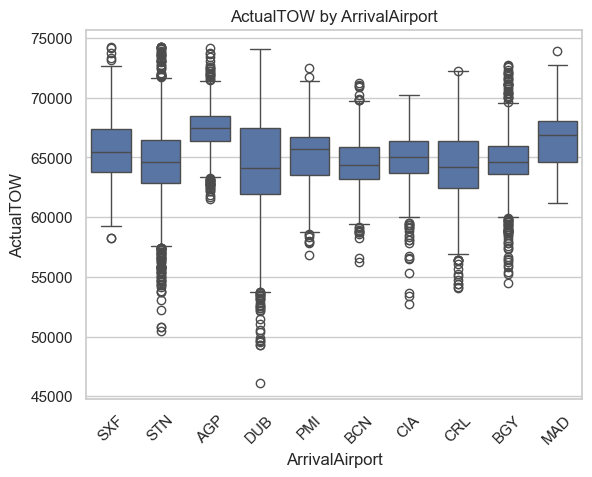

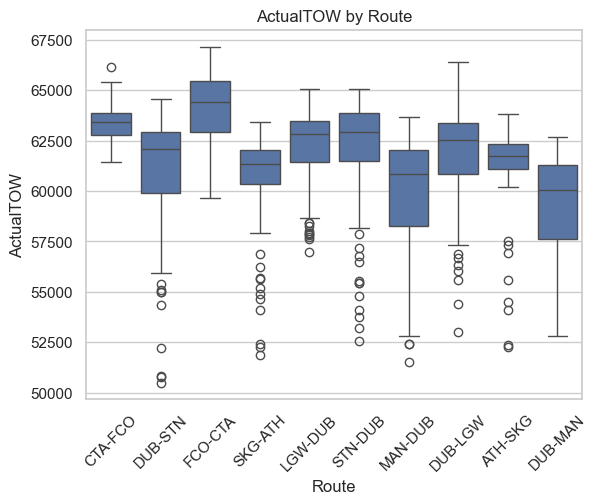

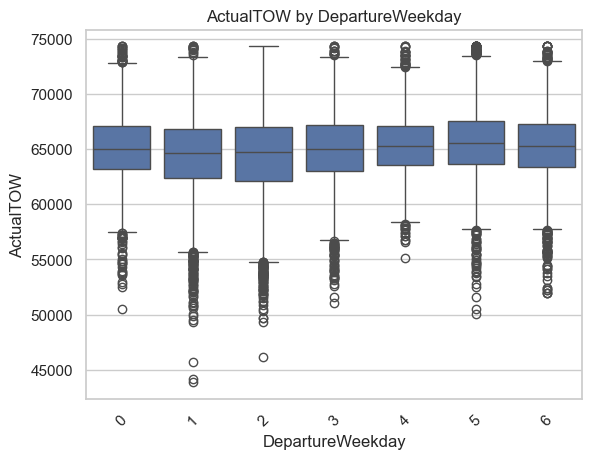

In [34]:
for cat in ["DepartureAirport", "ArrivalAirport", "Route", "DepartureWeekday"]:  # replace with your categorical cols
    top_cats = df_train_clean[cat].value_counts().head(10).index
    sns.boxplot(x=cat, y="ActualTOW", data=df_train_clean[df_train_clean[cat].isin(top_cats)])
    plt.xticks(rotation=45)
    plt.title(f"ActualTOW by {cat}")
    plt.show()

The distributions of ActualTOW (Take Off Weight) are similar across both arrival and departure airports, with most medians between 64,000 and 67,000 kg. AGP and MAD tend to show slightly higher TOW values, while airports like STN, BCN, and CRL have more low-end outliers, reflecting some variability in flight loads. Although there are outliers at all airports, no location exhibits a drastically different pattern, indicating consistent aircraft loading across major routes.

There are bigger differences in the 'Route' column, with some routes showing significantly higher or lower TOW values. Possible reasons for these differences could include:
- **Distance**: Longer routes may have higher TOW due to additional fuel requirements.
- **Aircraft Type**: Different aircraft types may have different loading capacities and fuel requirements.

Departure weekday analysis shows that TOW is generally consistent across weekdays, with no significant trends or patterns. This suggests that flight operations and loading practices are stable throughout the week, without major fluctuations in passenger or cargo loads.


## Exploratory Data Analysis (EDA) Summary

### Data Loading & Structure
- Loaded both training and validation datasets.
- No duplicate rows found; airport codes and routes are consistent and reasonable.

### Missing Values
- Main missing values in `ActualTOW`, `FLownPassengers`, `BagsCount`, and `FlightBagsWeight`.
- Rows missing `ActualTOW` or `FLownPassengers` are dropped, as these are critical for modeling.
- In validation, missing `FLownPassengers` are imputed with the median from the training set.

### Outlier Handling
- Significant outliers detected in `BagsCount`, `FlightBagsWeight`, and `ActualFlightTime`.
- Outliers are capped at the 1st and 99th percentiles (based on training data) for robust modeling.

### Feature Distributions
- After cleaning, key features (`FLownPassengers`, `BagsCount`, `FlightBagsWeight`, `ActualTotalFuel`, `ActualFlightTime`) show similar distributions in train and validation sets, supporting good generalization.

### Correlations & Imputation
- `BagsCount` and `FLownPassengers` show only moderate correlation; missing `BagsCount` is imputed with the median.
- `BagsCount` and `FlightBagsWeight` are strongly correlated; missing `FlightBagsWeight` is imputed using the average bag weight from the training set.

### Target Analysis
- `ActualTOW` has a plausible distribution with a smooth lower tail, indicating rare but valid low-weight flights.

### Categorical Analysis
- `ActualTOW` distributions are similar across airports, with some route-based differences likely due to distance or aircraft type.

### Conclusion
- Data is cleaned, outliers are handled, and missing values are imputed using robust statistics.
- Resulting train and validation sets are well-aligned and ready for modeling.